In [55]:
import pickle
import mne
from mne import create_info
from brainflow import BoardShim
from speller_config import *

filename = r'E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230419\sunsun_20230419.pickle'

with open(filename, 'rb') as handle:
    data = pickle.load(handle)

In [56]:
print(type(data))
data.shape

<class 'numpy.ndarray'>


(19, 28678)

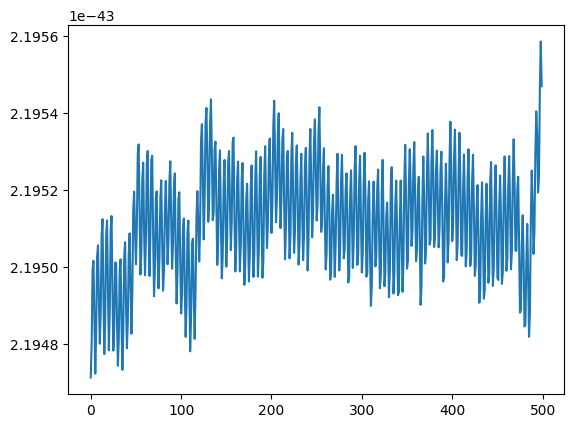

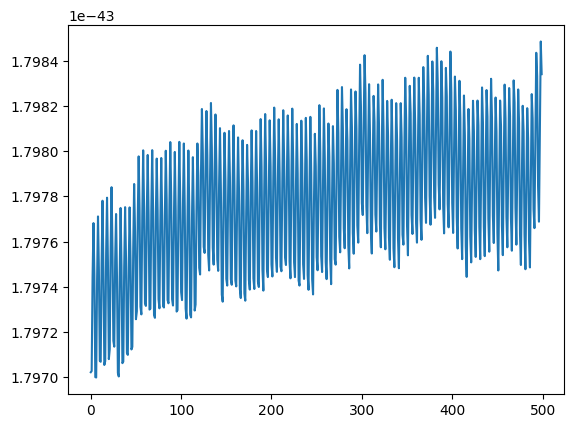

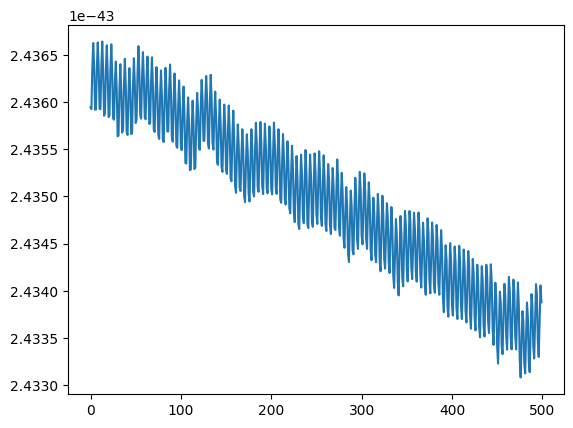

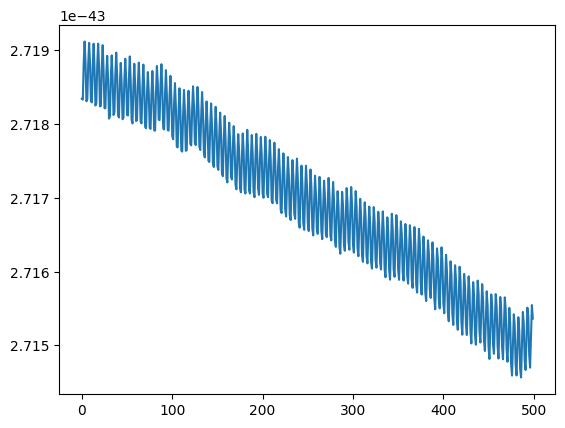

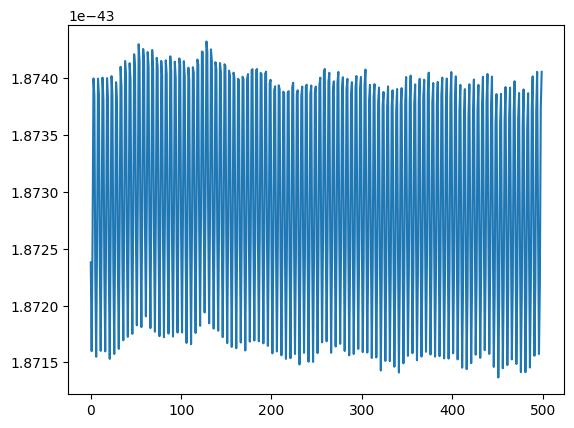

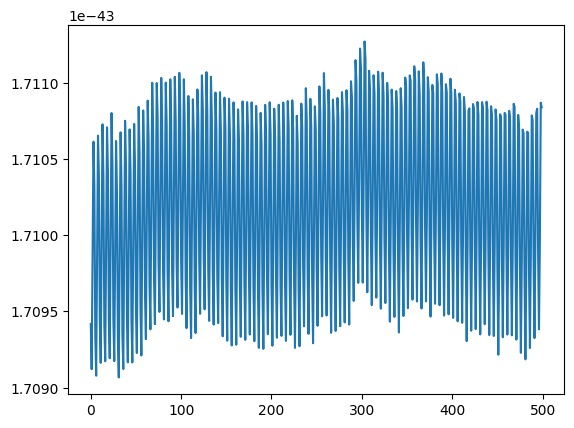

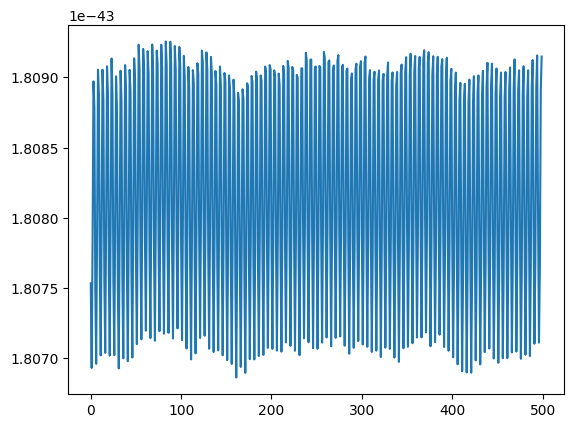

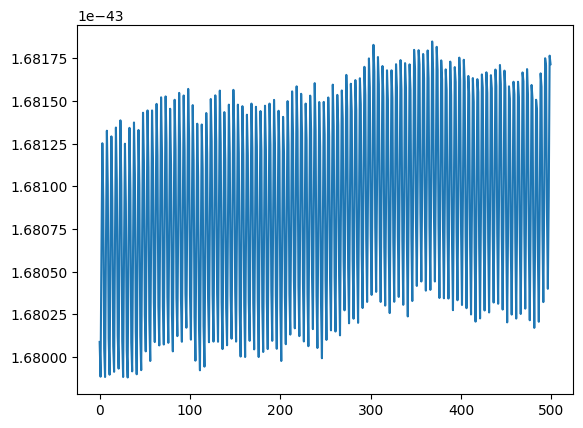

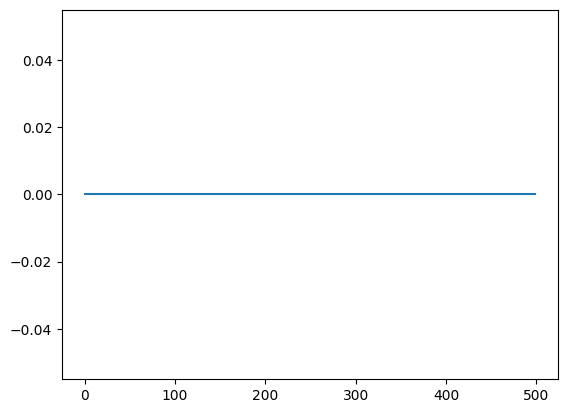

In [64]:
import matplotlib.pyplot as plt

marker_channel = BoardShim.get_marker_channel(BOARD_ID)
eeg_channels = BoardShim.get_eeg_channels(BOARD_ID)
data[eeg_channels] = data[eeg_channels] / 1e6
raw_data = data[eeg_channels + [marker_channel]]

for i in range(9):
    plt.plot(raw_data[i,-500:])
    plt.show()

In [44]:
marker_channel = BoardShim.get_marker_channel(BOARD_ID)
eeg_channels = BoardShim.get_eeg_channels(BOARD_ID)
data[eeg_channels] = data[eeg_channels] / 1e6
data = data[eeg_channels + [marker_channel]]
data.shape

(9, 28678)

In [45]:
_CHANNELS = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
ch_names = [ch_name.upper() for ch_name in _CHANNELS]
ch_names = ch_names + ['STIM']
ch_types = ["eeg"] * 9
ch_types[-1] = "stim"

info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=250)

Creating RawArray with float64 data, n_channels=9, n_times=28678
    Range : 0 ... 28677 =      0.000 ...   114.708 secs
Ready.


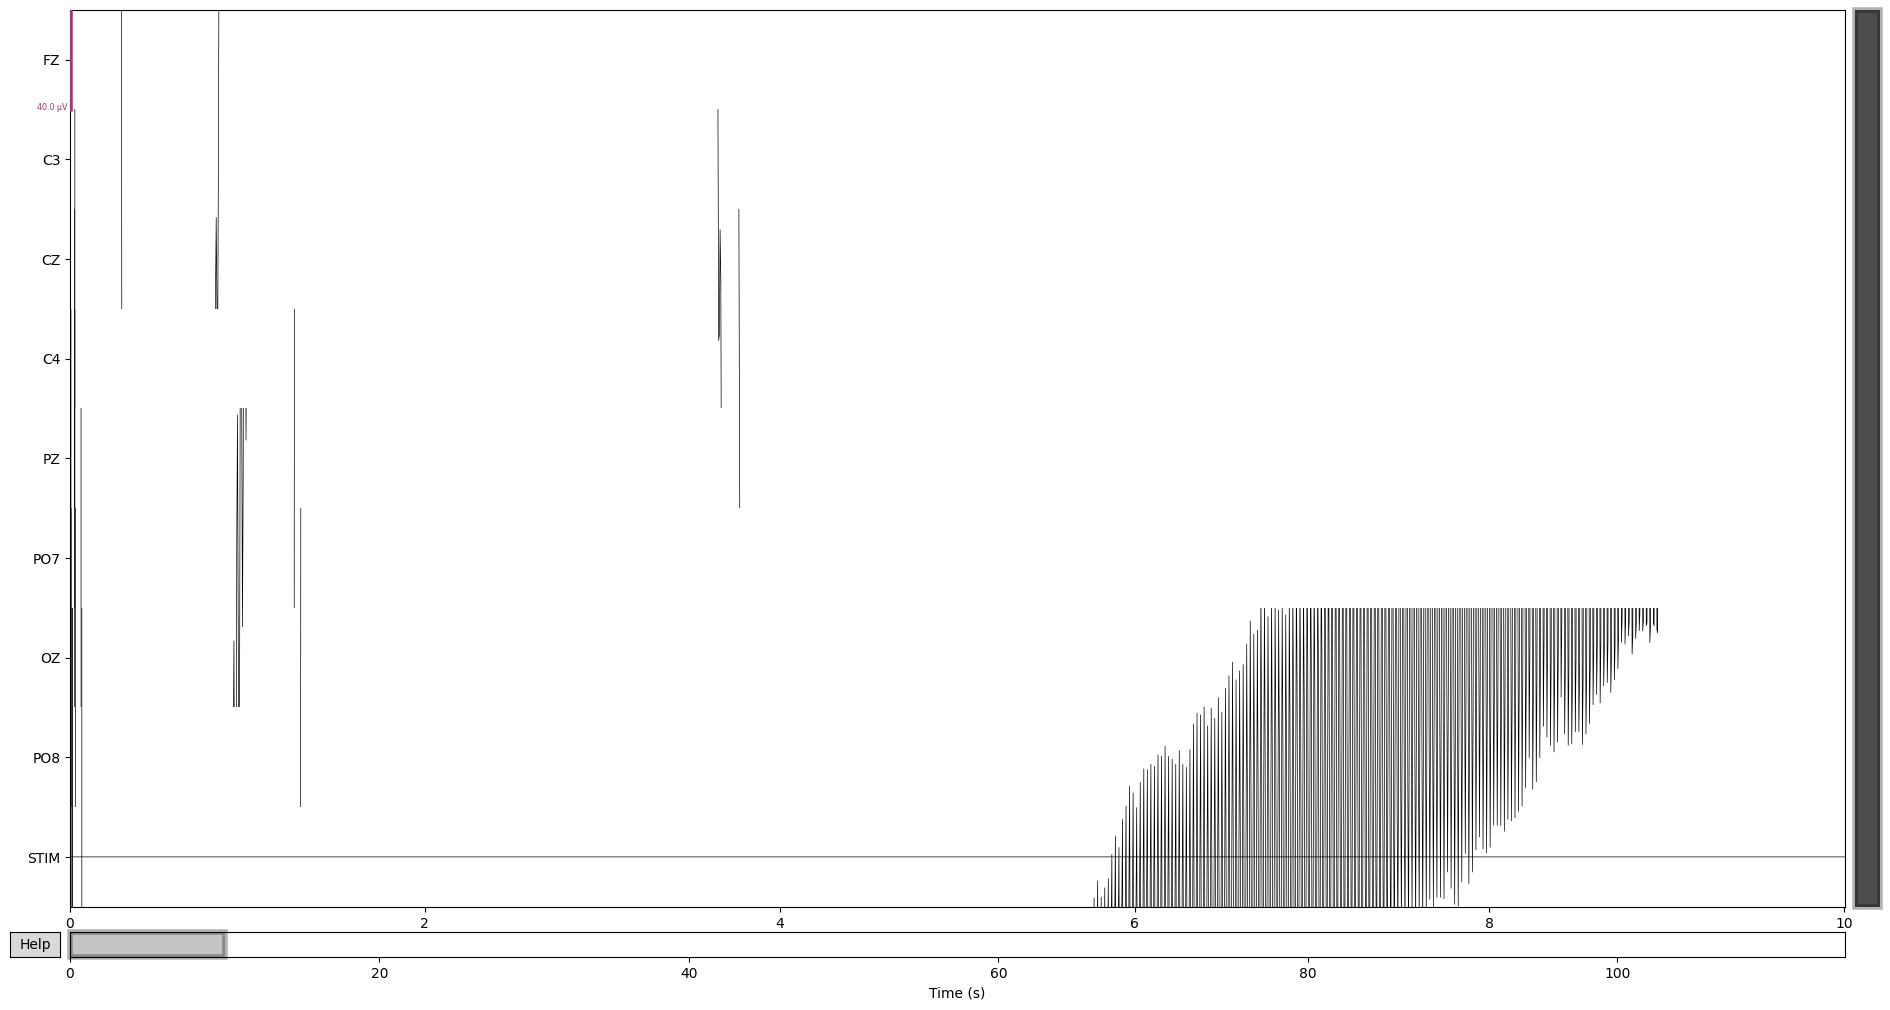

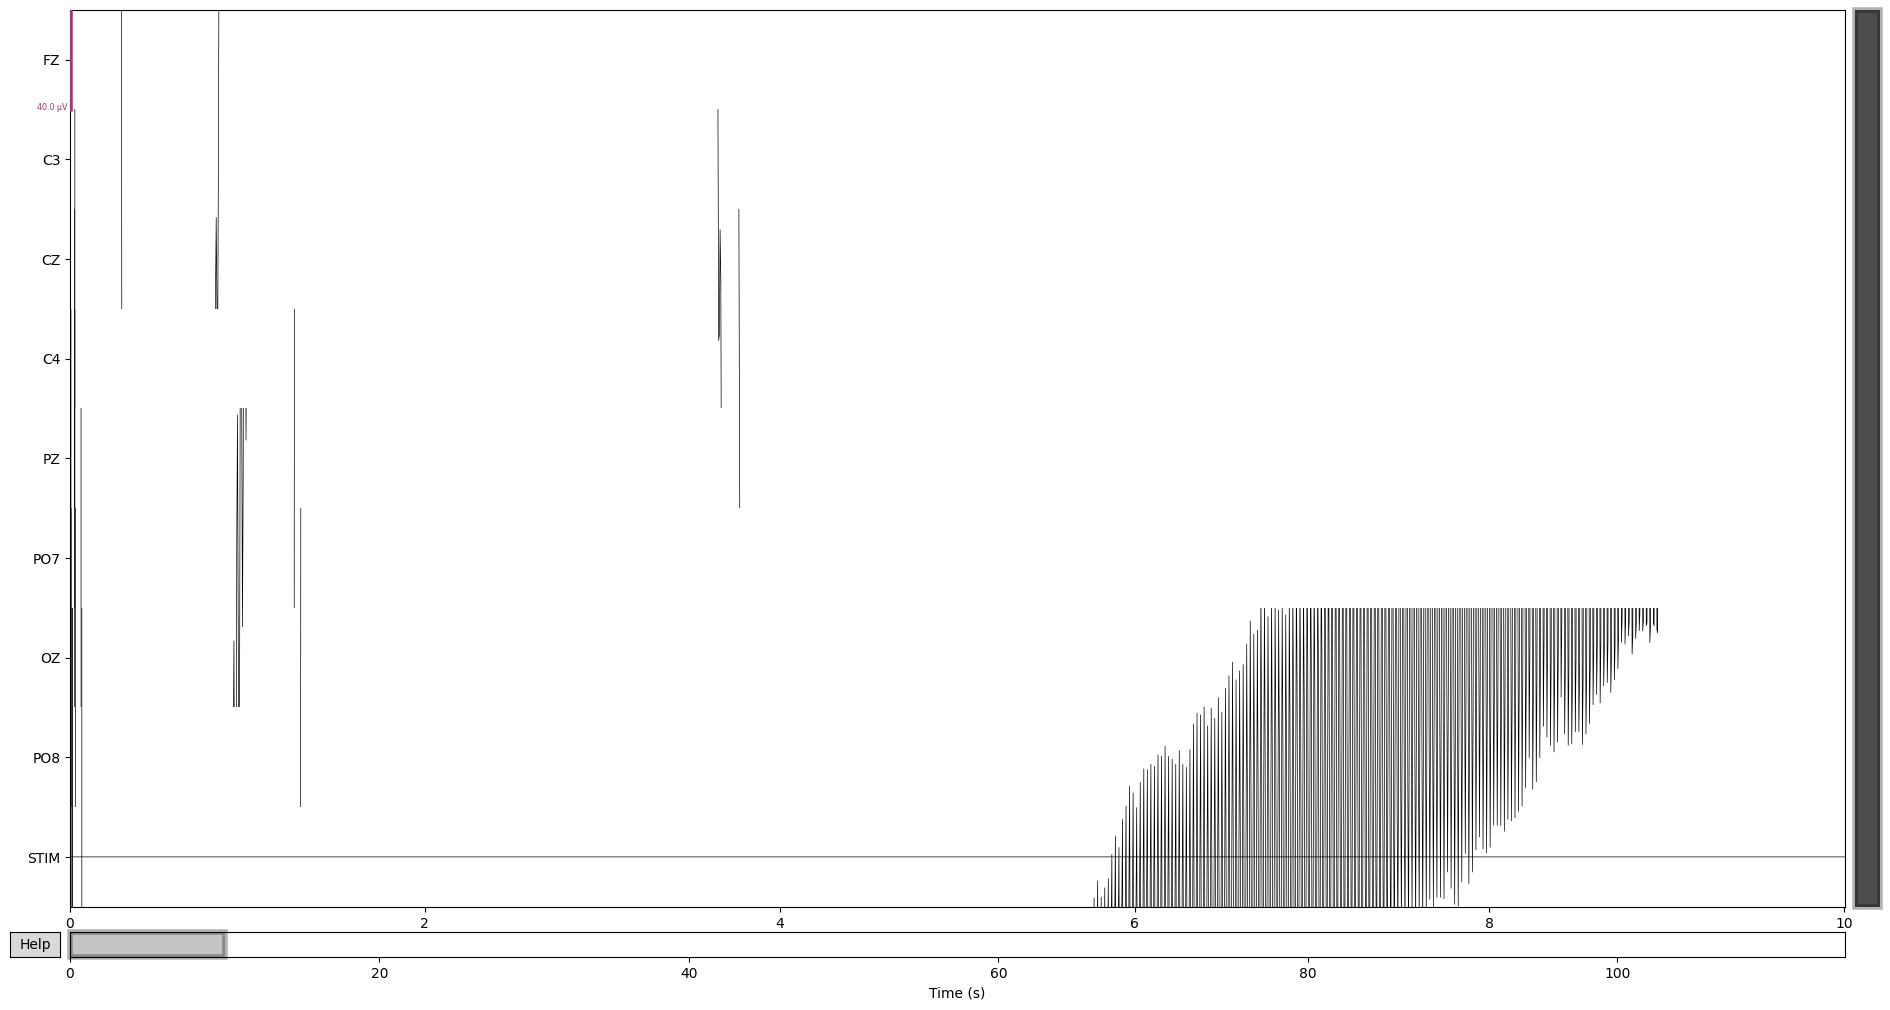

In [46]:
raw = mne.io.RawArray(data, info=info)
raw.plot()

In [68]:
raw.get_data().shape

(9, 28678)

In [72]:
raw.notch_filter([50])

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 9 x 28678 (114.7 s), ~2.0 MB, data loaded>

In [80]:
raw.filter(l_freq=4, h_freq=77)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 77.00 Hz
- Upper transition bandwidth: 19.25 Hz (-6 dB cutoff frequency: 86.62 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 9 x 28678 (114.7 s), ~2.0 MB, data loaded>

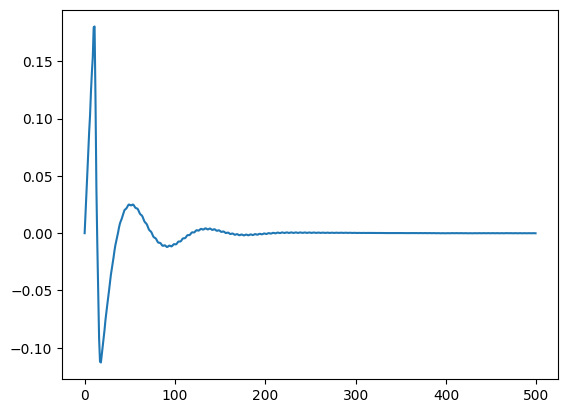

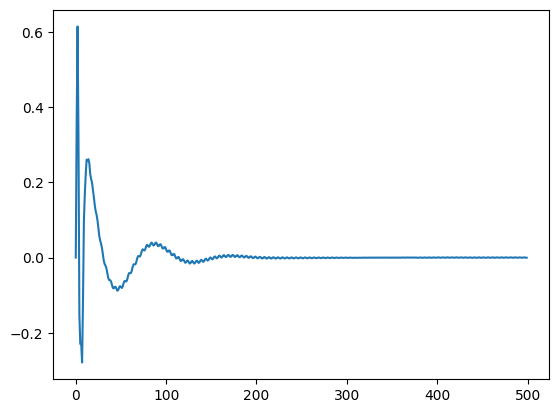

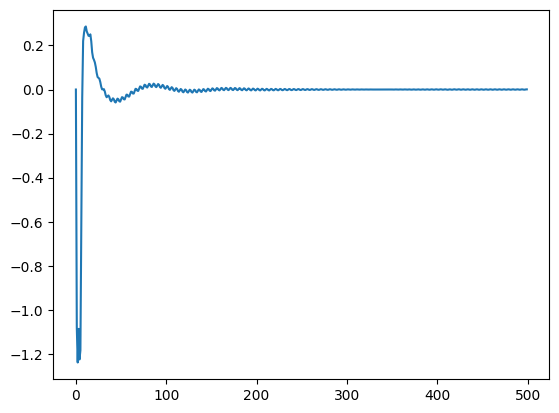

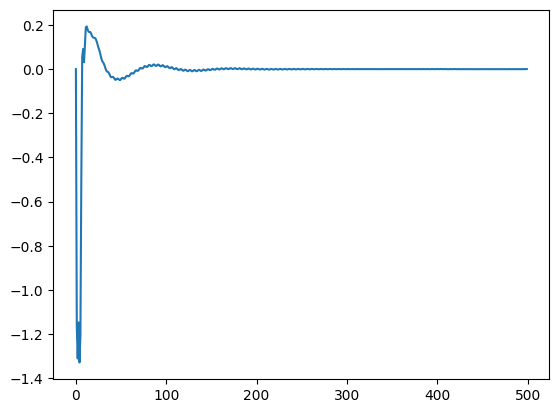

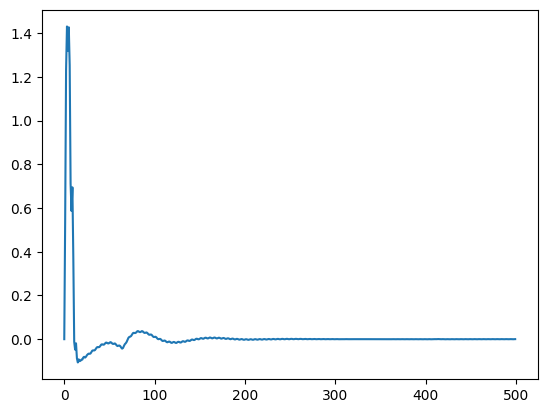

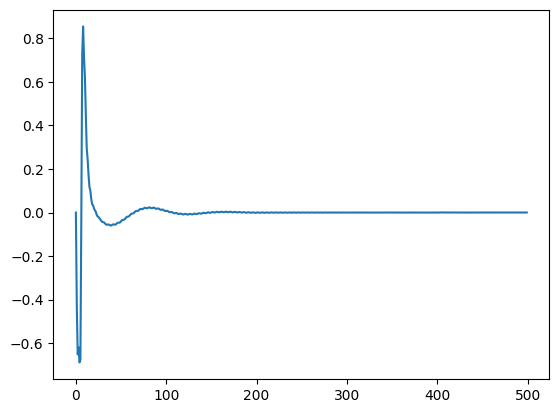

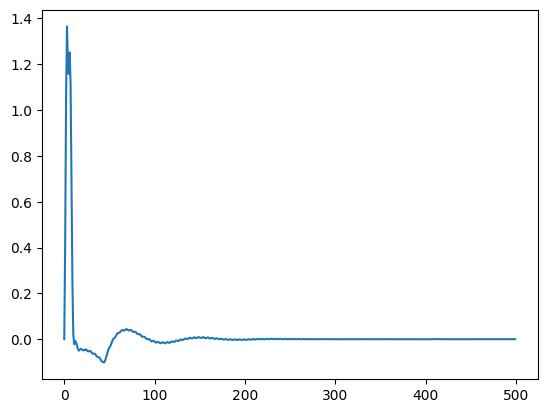

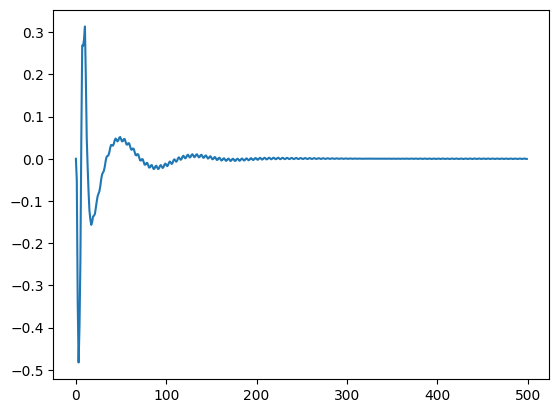

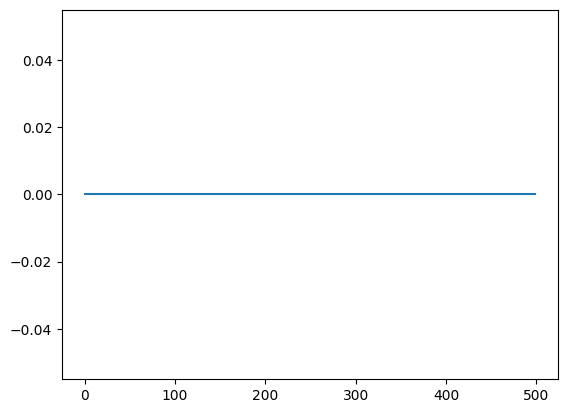

In [82]:
for i in range(9):
    plt.plot(raw.get_data()[i,:500])
    plt.show()